In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7,4]
import seaborn as sns
sns.set()
from scipy.stats import median_absolute_deviation as mad

In [2]:
def plt_pix_data(ref, tile, heal, pix, p):
    ref_data = ref[pix]
    tile_data = tile[pix]
    heal_data = heal[pix]
    pix_sat_data = sat_map[pix]
    pix_time_data = times[pix]
    
    print(p)
    
    f, axes = plt.subplots(1, 1, figsize=(14, 5), sharex=True)
    norad_ids, counts = np.unique(pix_sat_data, return_counts=True)
    sns.set()
    index = np.arange(len(norad_ids))
    plt.bar(index, counts, color=sns.color_palette('Spectral', len(counts)), alpha=0.7)
    plt.xticks(index, norad_ids, rotation=90)
    plt.title(f'Satellite passes in Healpix pixel: {pix}')
    plt.tight_layout()
    plt.show()
    plt.close()
    
    f, axes = plt.subplots(1, 3, figsize=(14, 5), sharex=True)
    sns.despine(left=True)
    sns.distplot(ref_data, bins=20, color='seagreen' , ax=axes[0]).set_title(f'Ref Power Distribution in Pixel: {pix}')
    sns.distplot(tile_data, bins=20, color='seagreen' , ax=axes[1]).set_title(f'Tile Power Distribution in Pixel: {pix}')
    sns.distplot(heal_data, bins=20, color='seagreen' , ax=axes[2]).set_title(f'Diff Power Distribution in Pixel: {pix}')
    plt.tight_layout()
    plt.show()
    plt.close()
    

    
    ref_sat_data = {n:np.asarray(ref_data)[np.where(np.asarray(pix_sat_data) == n)] for n in norad_ids}
    tile_sat_data = {n:np.asarray(tile_data)[np.where(np.asarray(pix_sat_data) == n)] for n in norad_ids}
    heal_sat_data = {n:np.asarray(heal_data)[np.where(np.asarray(pix_sat_data) == n)] for n in norad_ids}
    time_data = {n:np.asarray(pix_time_data)[np.where(np.asarray(pix_sat_data) == n)] for n in norad_ids}
    
    ref_41187 = ref_sat_data[41187]
    tile_41187 = tile_sat_data[41187]
    heal_41187 = heal_sat_data[41187]
    time_41187 = (np.asarray(time_data[41187]) - time_data[41187][0])/(60*60*24)
    
    f, axes = plt.subplots(1, 3, figsize=(14, 5), sharex=True)
    sns.despine(left=True)
    sns.distplot(ref_41187, bins=20, color='seagreen' , ax=axes[0]).set_title(f'Ref Satellite 41187 Power Distribution in Pixel: {pix}')
    sns.distplot(tile_41187, bins=20, color='seagreen' , ax=axes[1]).set_title(f'Tile Satellite 41187 Power Distribution in Pixel: {pix}')
    sns.distplot(heal_41187, bins=20, color='seagreen' , ax=axes[2]).set_title(f'Diff Satellite 41187 Power Distribution in Pixel: {pix}')
    plt.tight_layout()
    plt.show()
    plt.close()
    
    f, axes = plt.subplots(1, 3, figsize=(14, 5), sharex=True, sharey=True)
    sns.despine(left=True)
    sns.scatterplot(time_41187, ref_41187, ax=axes[0]).set_title(f'Gain test: Power in REF pixel {pix} by sat 41187')
    sns.scatterplot(time_41187, tile_41187, ax=axes[1]).set_title(f'Gain test: Power in TILE pixel {pix} by sat 41187')
    sns.scatterplot(time_41187, heal_41187, ax=axes[2]).set_title(f'Gain test: Power in DIFF pixel {pix} by sat 41187')
    plt.tight_layout()
    plt.show()
    plt.close()

S08XX_rf0XX


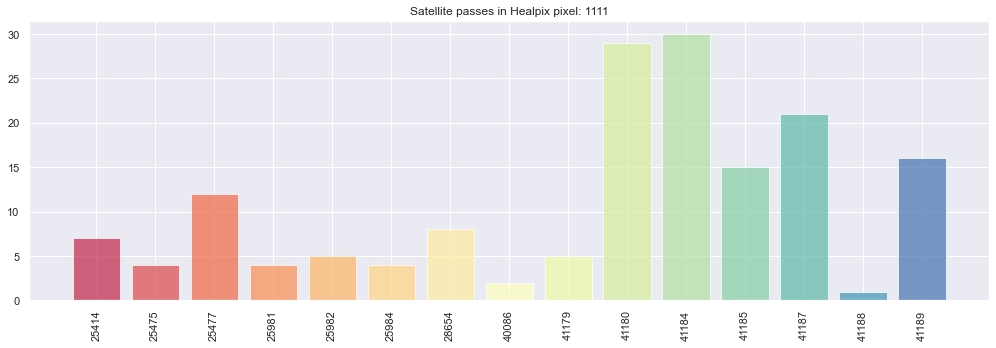

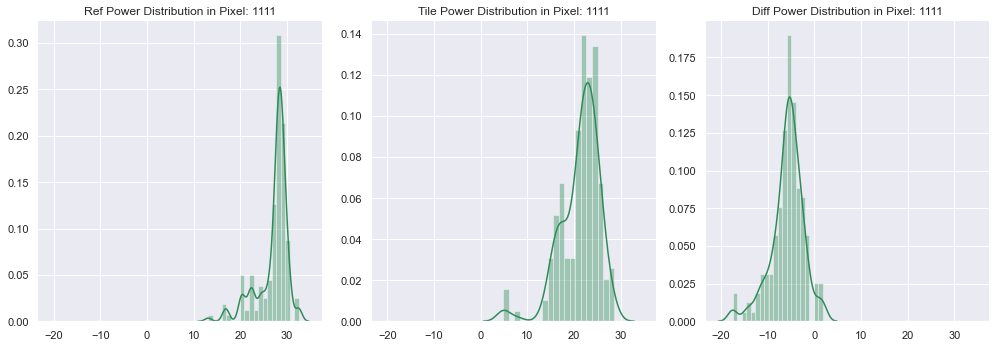

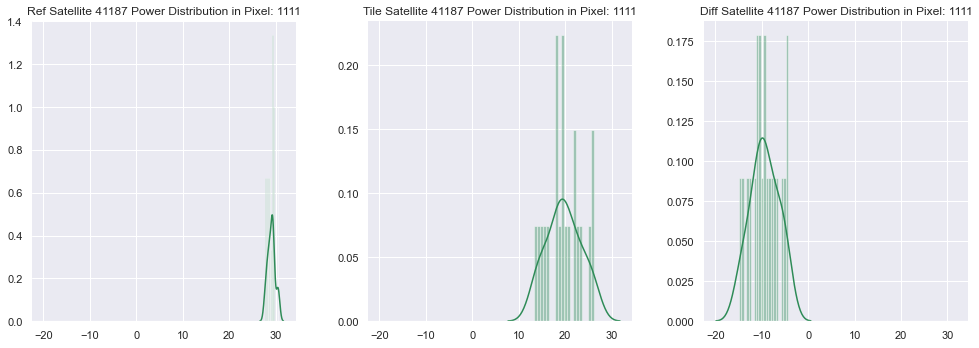

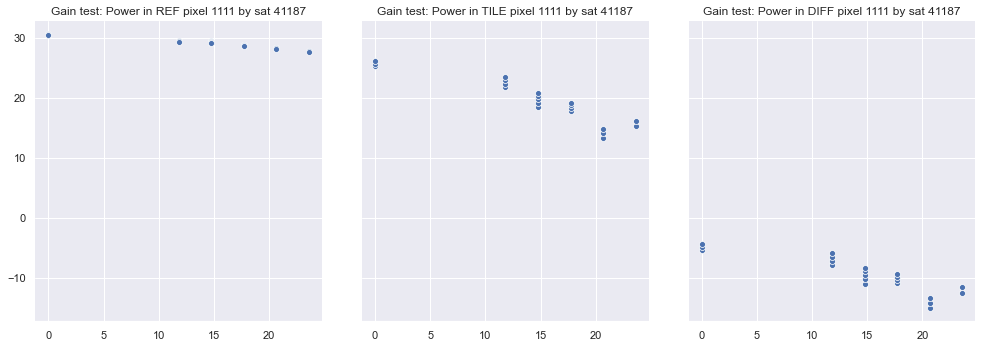

In [3]:
map_data = np.load('../../../outputs/tile_maps/S08XX_rf0XX_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}

healpix_maps = map_data['healpix_maps']
sat_maps = map_data['sat_map']
times = map_data['times']
tile_maps = map_data['tile_maps']
ref_maps = map_data['ref_maps']

healpix_map = healpix_maps['0']
ref_map = ref_maps['0']
tile_map = tile_maps['0']
sat_map = sat_maps['0']
times = times['0']

map_counts = [len(i) for i in healpix_map]

plt_pix_data(ref_map, tile_map, healpix_map, 1111, 'S08XX_rf0XX')

S08XX_rf1XX


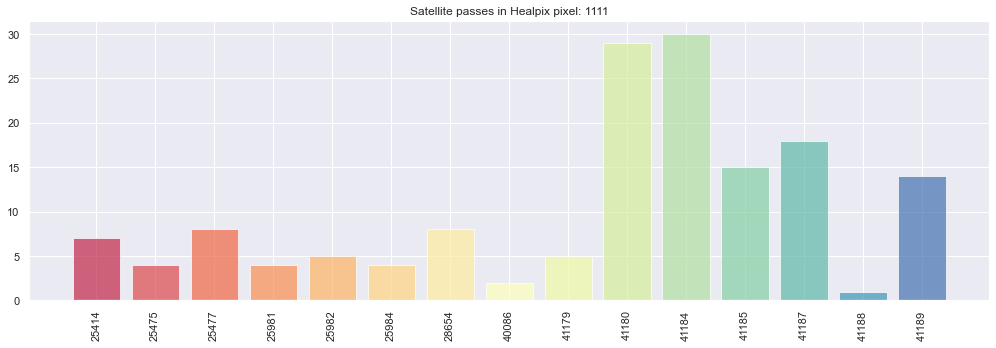

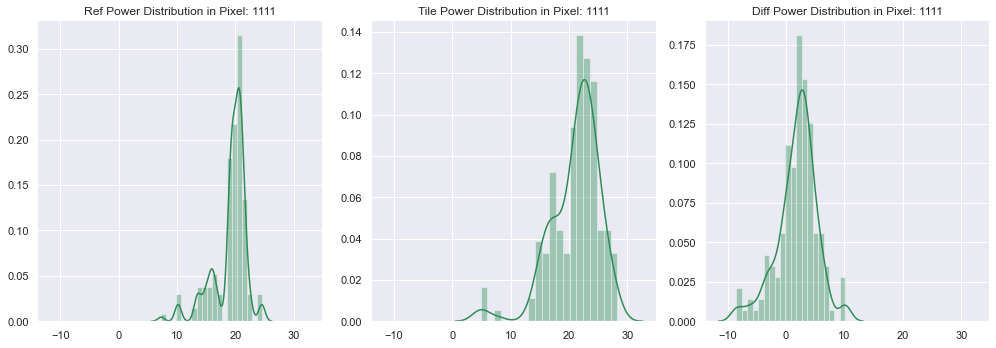

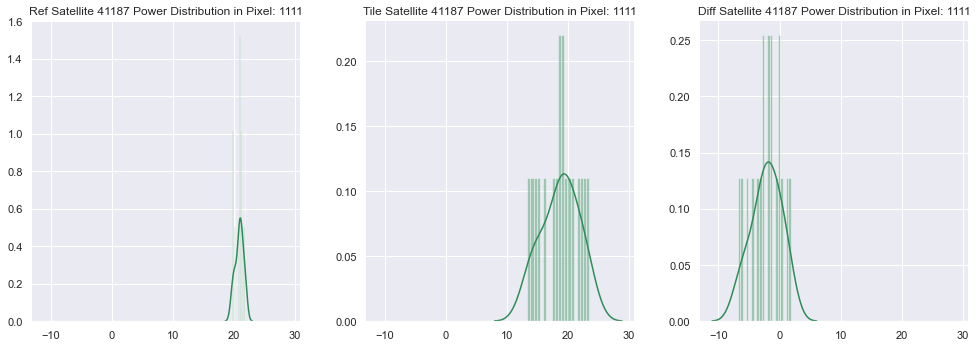

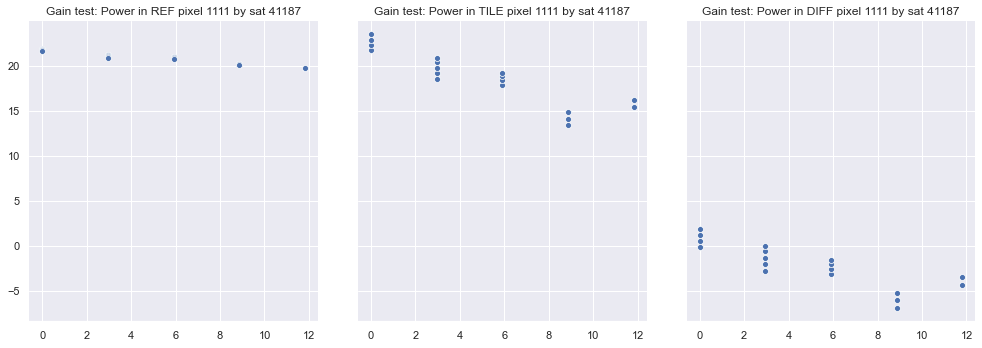

In [4]:
map_data = np.load('../../../outputs/tile_maps/S08XX_rf1XX_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}

healpix_maps = map_data['healpix_maps']
sat_maps = map_data['sat_map']
times = map_data['times']
tile_maps = map_data['tile_maps']
ref_maps = map_data['ref_maps']

healpix_map = healpix_maps['0']
ref_map = ref_maps['0']
tile_map = tile_maps['0']
sat_map = sat_maps['0']
times = times['0']

map_counts = [len(i) for i in healpix_map]

plt_pix_data(ref_map, tile_map, healpix_map, 1111, 'S08XX_rf1XX')

S08YY_rf0YY


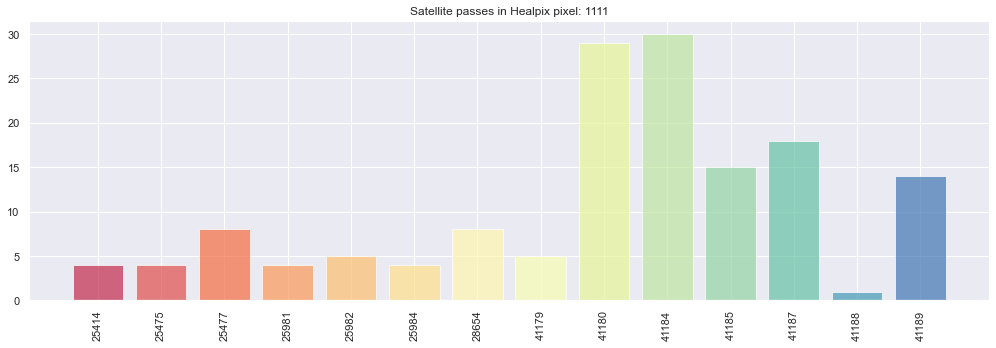

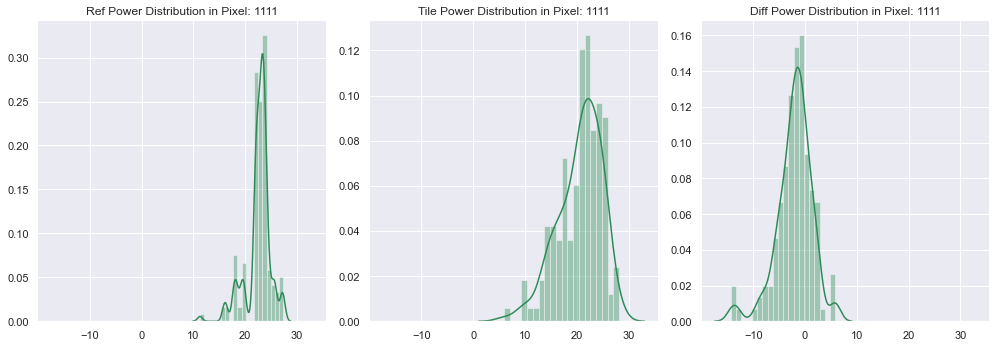

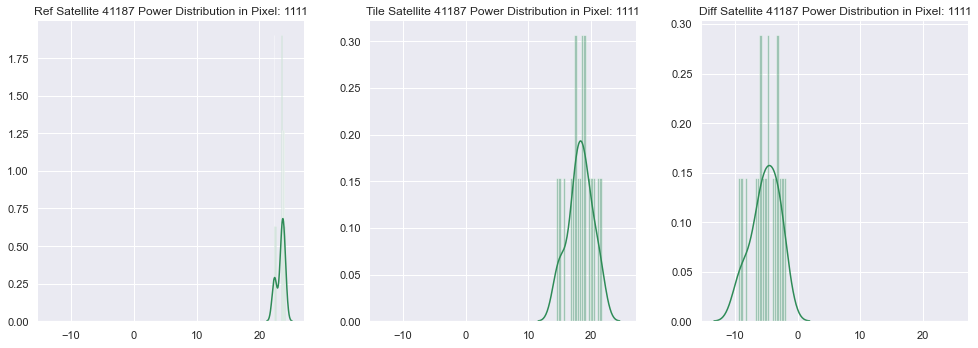

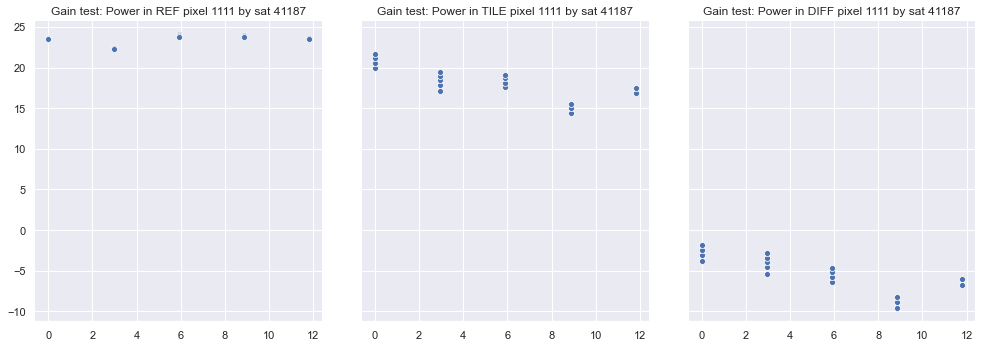

In [5]:
map_data = np.load('../../../outputs/tile_maps/S08YY_rf0YY_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}

healpix_maps = map_data['healpix_maps']
sat_maps = map_data['sat_map']
times = map_data['times']
tile_maps = map_data['tile_maps']
ref_maps = map_data['ref_maps']

healpix_map = healpix_maps['0']
ref_map = ref_maps['0']
tile_map = tile_maps['0']
sat_map = sat_maps['0']
times = times['0']

map_counts = [len(i) for i in healpix_map]

plt_pix_data(ref_map, tile_map, healpix_map, 1111, 'S08YY_rf0YY')

S08YY_rf1YY


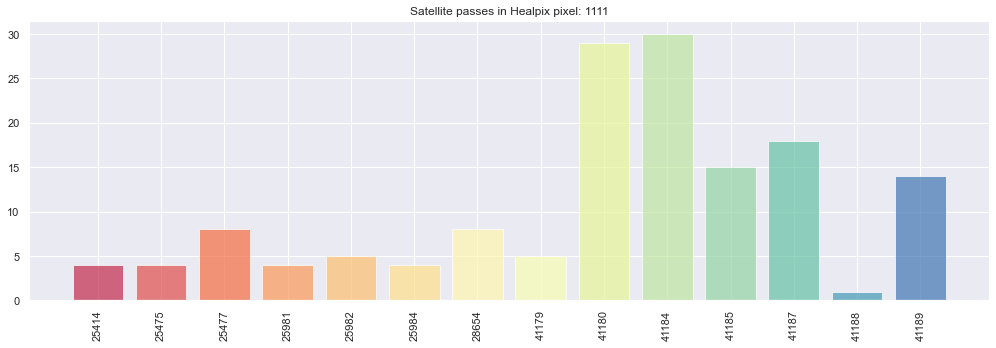

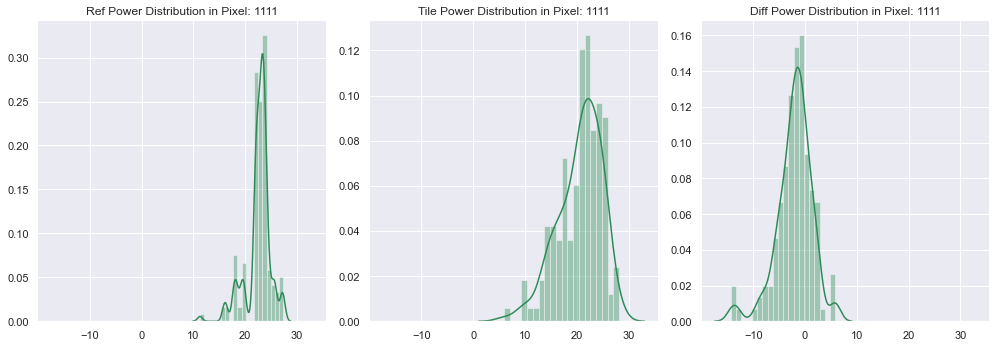

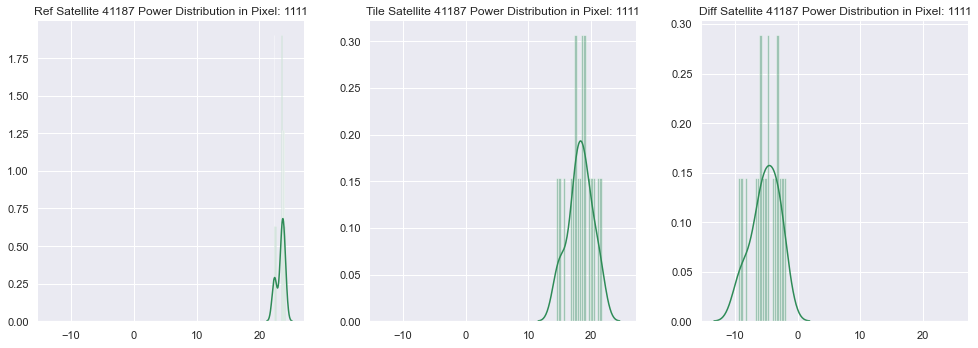

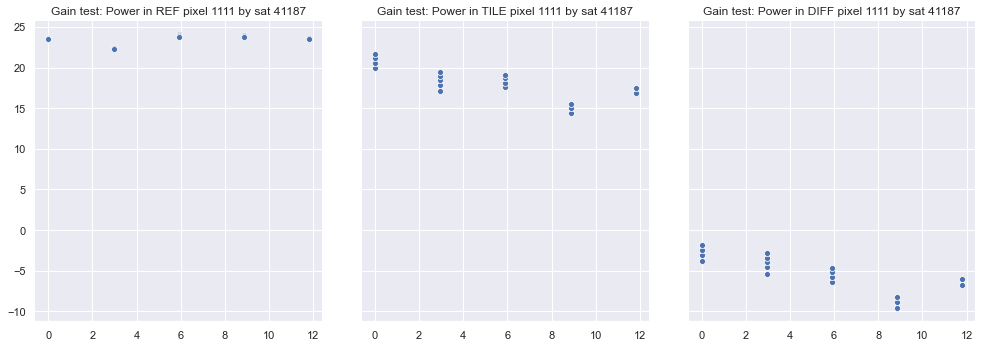

In [6]:
map_data = np.load('../../../outputs/tile_maps/S08YY_rf0YY_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}

healpix_maps = map_data['healpix_maps']
sat_maps = map_data['sat_map']
times = map_data['times']
tile_maps = map_data['tile_maps']
ref_maps = map_data['ref_maps']

healpix_map = healpix_maps['0']
ref_map = ref_maps['0']
tile_map = tile_maps['0']
sat_map = sat_maps['0']
times = times['0']

map_counts = [len(i) for i in healpix_map]

plt_pix_data(ref_map, tile_map, healpix_map, 1111, 'S08YY_rf1YY')

S36XX_rf0XX


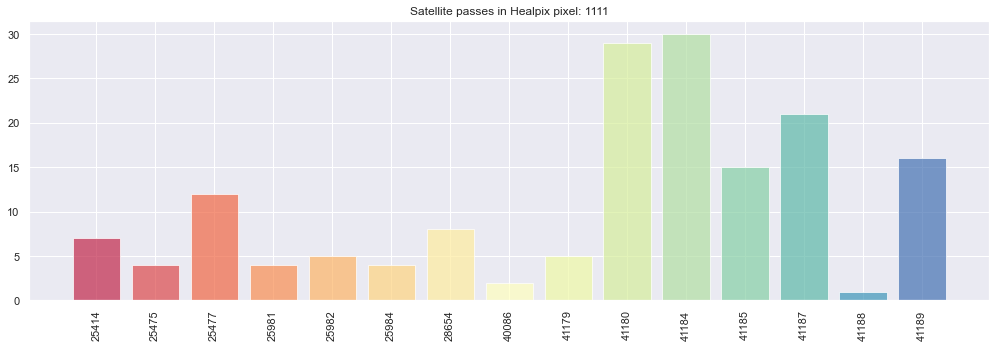

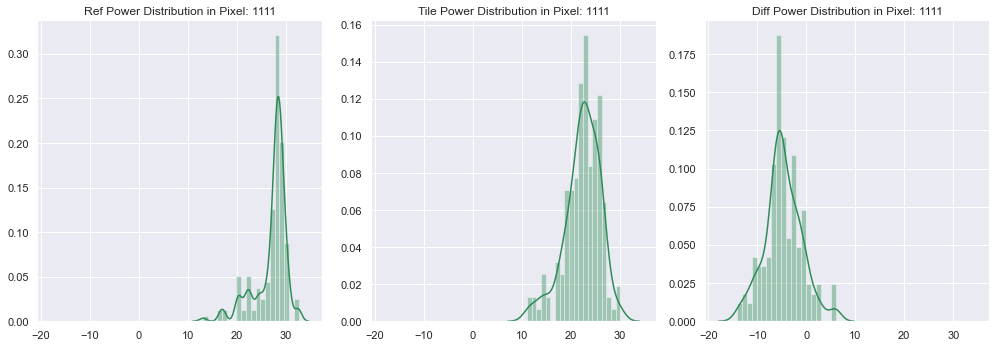

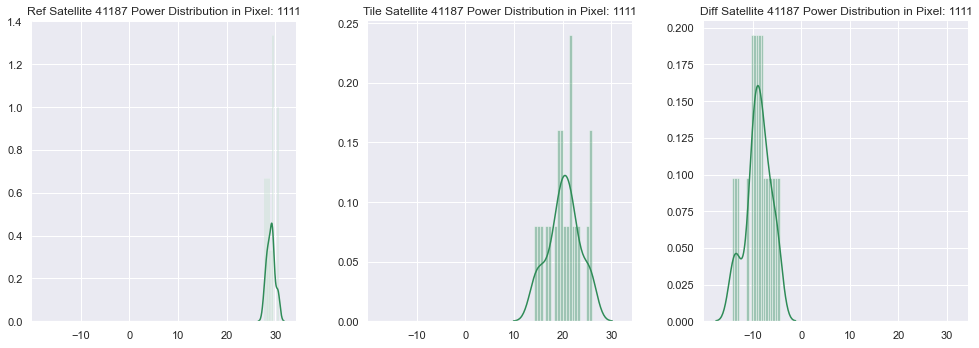

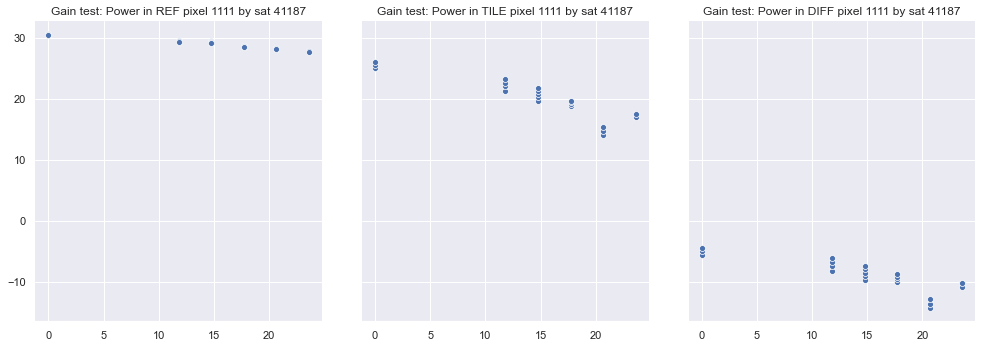

In [7]:
map_data = np.load('../../../outputs/tile_maps/S36XX_rf0XX_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}

healpix_maps = map_data['healpix_maps']
sat_maps = map_data['sat_map']
times = map_data['times']
tile_maps = map_data['tile_maps']
ref_maps = map_data['ref_maps']

healpix_map = healpix_maps['0']
ref_map = ref_maps['0']
tile_map = tile_maps['0']
sat_map = sat_maps['0']
times = times['0']

map_counts = [len(i) for i in healpix_map]

plt_pix_data(ref_map, tile_map, healpix_map, 1111, 'S36XX_rf0XX')

S36XX_rf1XX


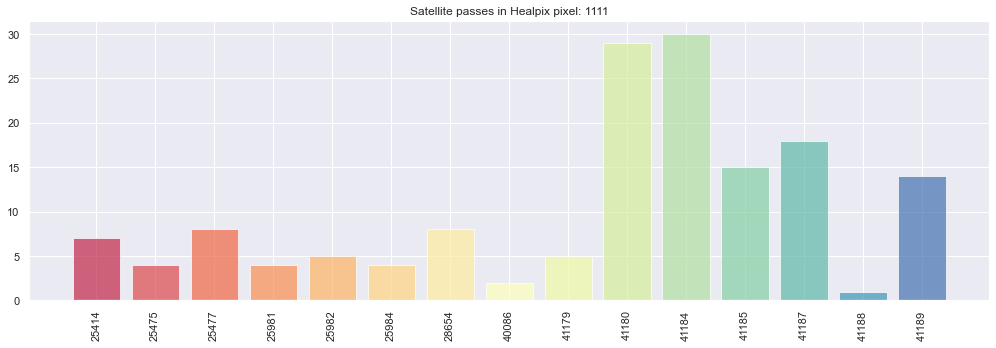

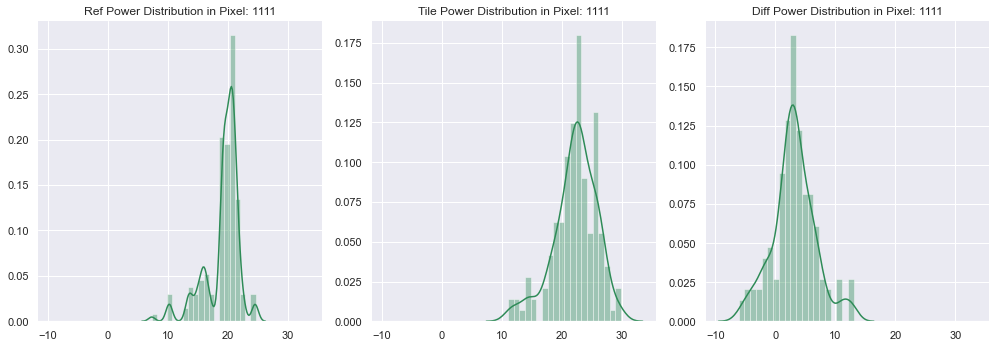

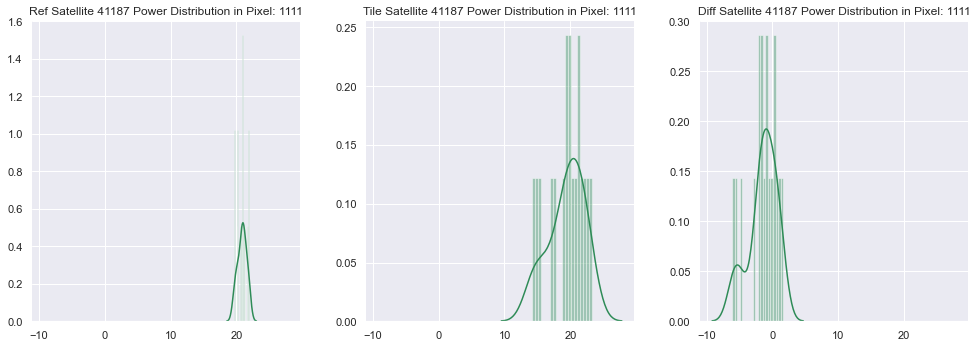

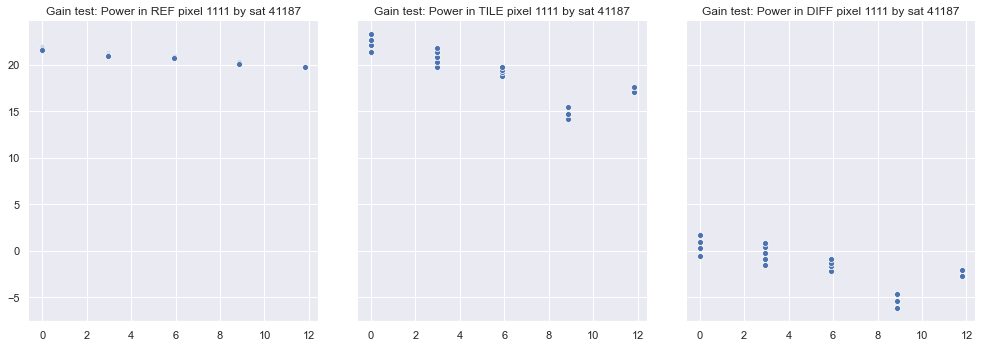

In [8]:
map_data = np.load('../../../outputs/tile_maps/S36XX_rf1XX_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}

healpix_maps = map_data['healpix_maps']
sat_maps = map_data['sat_map']
times = map_data['times']
tile_maps = map_data['tile_maps']
ref_maps = map_data['ref_maps']

healpix_map = healpix_maps['0']
ref_map = ref_maps['0']
tile_map = tile_maps['0']
sat_map = sat_maps['0']
times = times['0']

map_counts = [len(i) for i in healpix_map]

plt_pix_data(ref_map, tile_map, healpix_map, 1111, 'S36XX_rf1XX')

S36YY_rf0YY


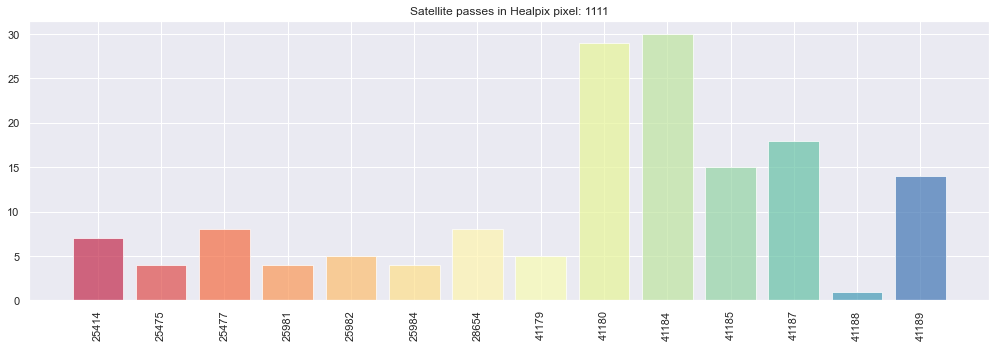

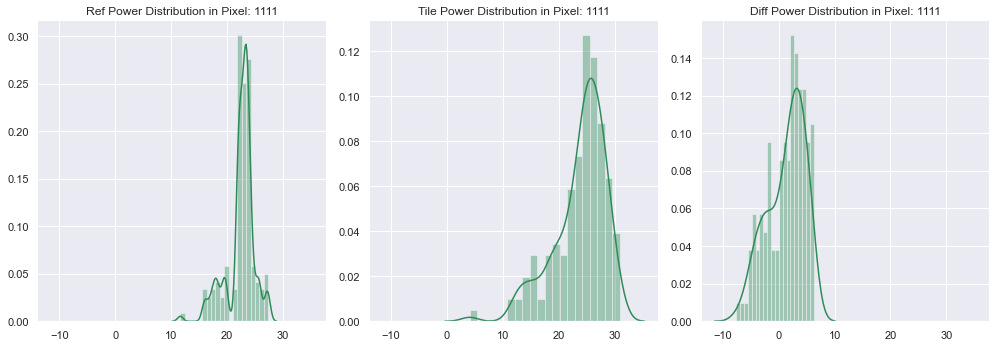

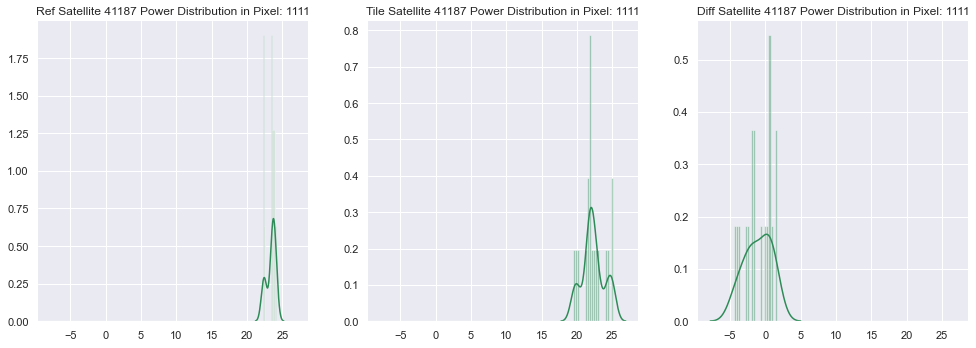

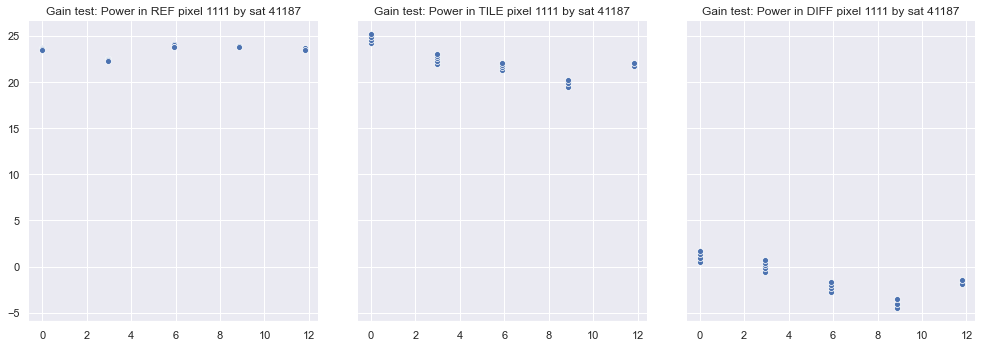

In [9]:
map_data = np.load('../../../outputs/tile_maps/S36YY_rf0YY_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}

healpix_maps = map_data['healpix_maps']
sat_maps = map_data['sat_map']
times = map_data['times']
tile_maps = map_data['tile_maps']
ref_maps = map_data['ref_maps']

healpix_map = healpix_maps['0']
ref_map = ref_maps['0']
tile_map = tile_maps['0']
sat_map = sat_maps['0']
times = times['0']

map_counts = [len(i) for i in healpix_map]

plt_pix_data(ref_map, tile_map, healpix_map, 1111, 'S36YY_rf0YY')

S36YY_rf1YY


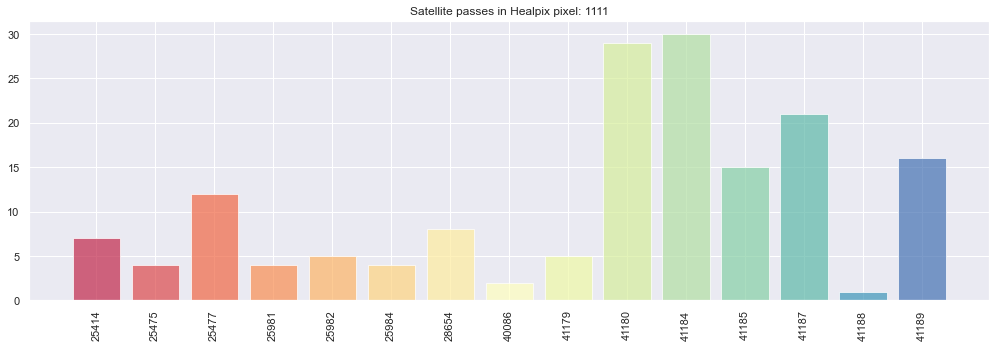

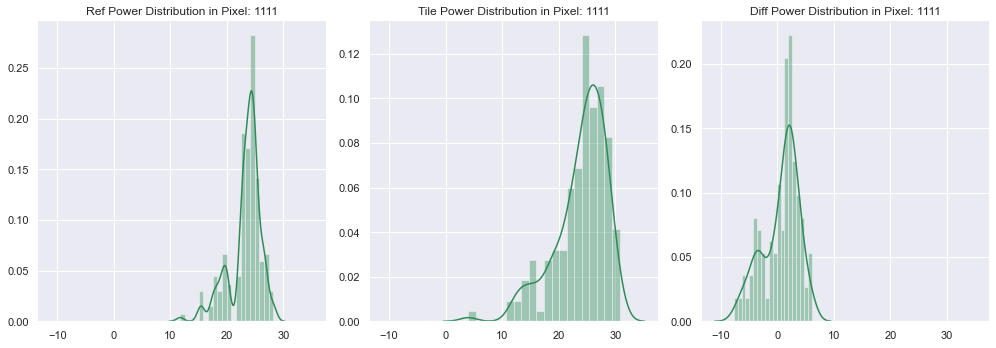

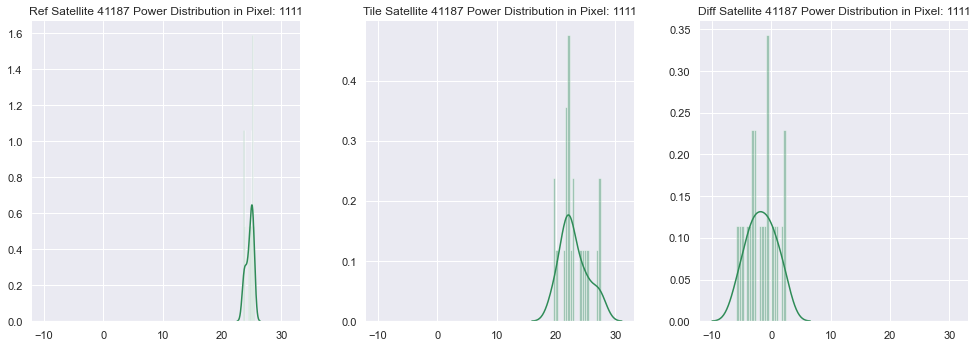

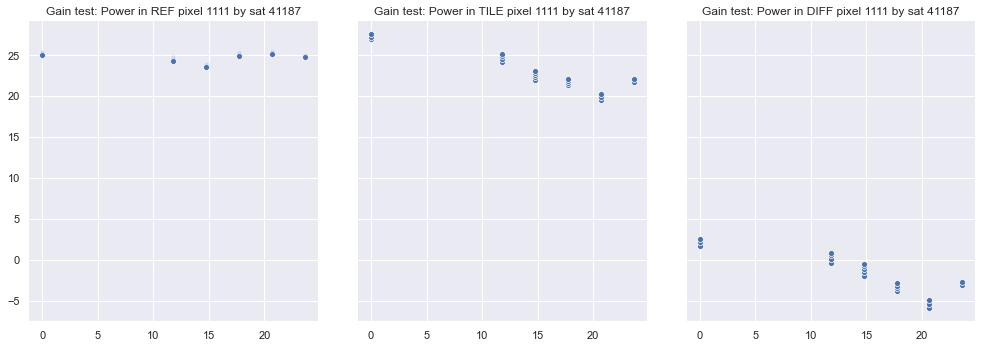

In [10]:
map_data = np.load('../../../outputs/tile_maps/S36YY_rf1YY_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}

healpix_maps = map_data['healpix_maps']
sat_maps = map_data['sat_map']
times = map_data['times']
tile_maps = map_data['tile_maps']
ref_maps = map_data['ref_maps']

healpix_map = healpix_maps['0']
ref_map = ref_maps['0']
tile_map = tile_maps['0']
sat_map = sat_maps['0']
times = times['0']

map_counts = [len(i) for i in healpix_map]

plt_pix_data(ref_map, tile_map, healpix_map, 1111, 'S36YY_rf1YY')

S36YY_rf1YY


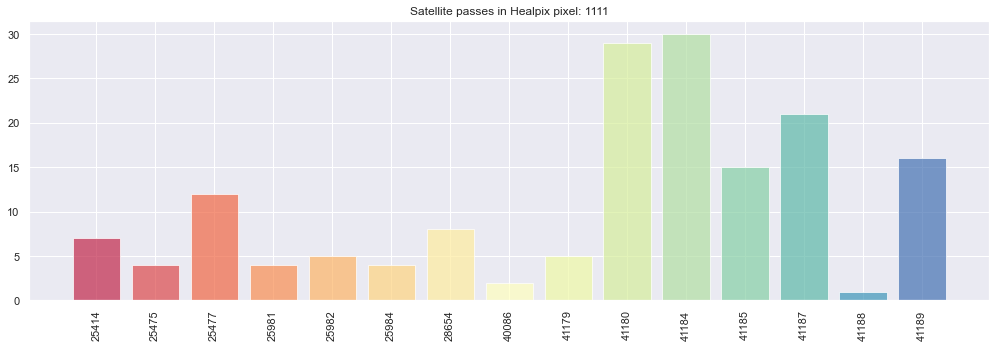

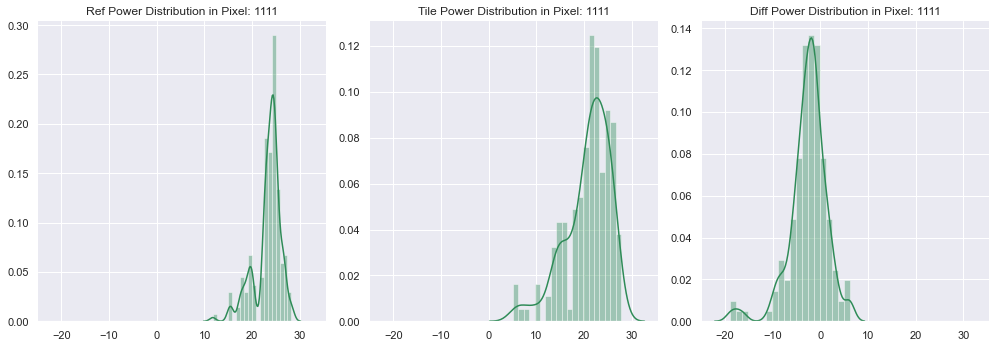

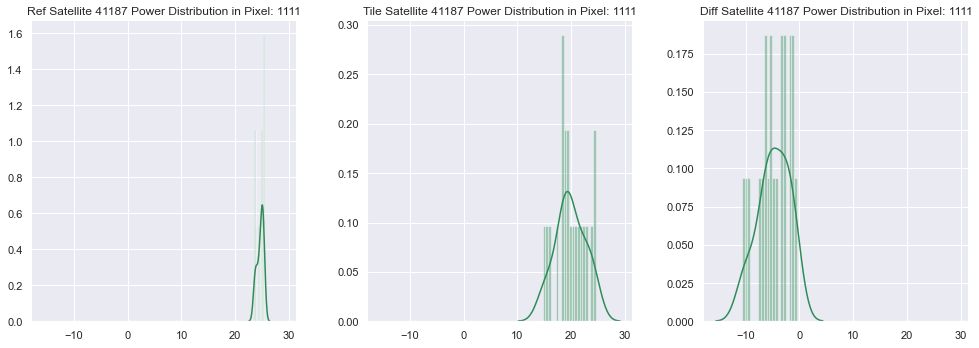

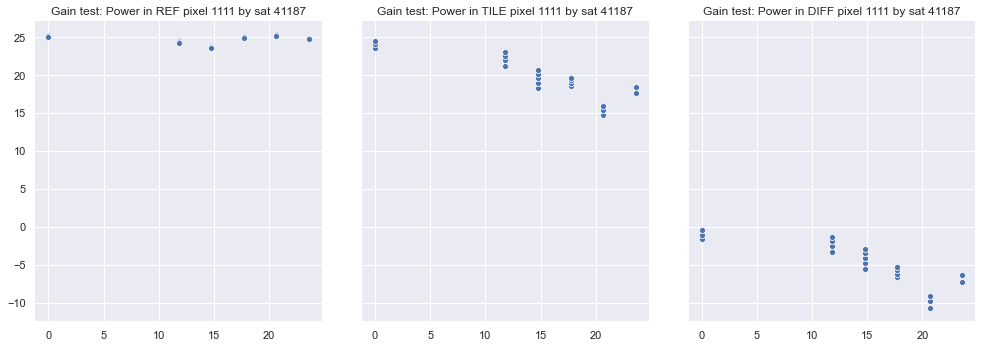

In [24]:
map_data = np.load('../../../outputs/tile_maps/S35YY_rf1YY_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}

healpix_maps = map_data['healpix_maps']
sat_maps = map_data['sat_map']
times = map_data['times']
tile_maps = map_data['tile_maps']
ref_maps = map_data['ref_maps']

healpix_map = healpix_maps['0']
ref_map = ref_maps['0']
tile_map = tile_maps['0']
sat_map = sat_maps['0']
times = times['0']

map_counts = [len(i) for i in healpix_map]

plt_pix_data(ref_map, tile_map, healpix_map, 1111, 'S36YY_rf1YY')